In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>body {font-family: Helvetica;}</style>'))

In [30]:

# Import libraries necessary for this project

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import r2_score

# custom modules
import helpers.boston_visuals as vs
import helpers.overunderfitting as ov


# plotting layout setup
sns.set_style(style='darkgrid')
%matplotlib inline
    
# auto reload of custom modules
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


___

# Important Resources

+ [Introduction to Statistical Learning](https://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) _(link to downlad the .pdf version)_
+ [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/) _(github.io based e-book)_

+ bias / variance: what / impact / how to measure?
+ loss function: how to define?
+ cross-validation: when / purpose?
+ R² vs adjusted-R²: when / good choice?
+ R² vs adjusted-R² on random noise

+ feature importance: train or test set?

Links to double-check:

+ https://en.m.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff
+ http://scott.fortmann-roe.com/docs/MeasuringError.html
+ http://cs229.stanford.edu/materials/ML-advice.pdf

___

# Modeling Relationships

## Context

Suppose that we observe a quantitative response $Y$ and $p$ different predictors $X = X1, X2,...,Xp$. We assume that there is some relationship between them, which can be written in the very general form: 

$$Y = f(X) + \epsilon$$

+ $f$ is some fixed but unknown function of $X$.
+ $\epsilon$ is a random error term, which is independent of $X$ and has mean zero.

## Estimate function

We create an estimate $\hat{f}$ that predicts $Y$: $\hat{Y} = \hat{f}(X)$. There will always be two errors elements:

$$E (Y - \hat{Y}) = [f(X) - \hat{f}(X)]^{2} + Var(\epsilon)$$

Where:
+ $E (Y - \hat{Y})$ is the average squared error of predictions.
+ $[f(X) - \hat{f}(X)]^{2} $ is the reducible error. Our aim is to reduce this error.
+ $Var(\epsilon)$ is the irreducible error, that cannot be predicted using $X$.

## Predictions vs Inference

When focusing on **predictions accuracy**, we are not overly concern with the shape of $\hat{f}$, as long as it yields accurate predictions for $Y$: we treat it as a black box.

When focusing on **inference**, we want to understand the way that $Y$ is affected as $X$ changes, so we cannot treat $\hat{f}$ as a black box:

+ Which predictors are associated with the response? Which ones are the most important?
+ What is the relationship between the response and each predictor: positive or negative? Is there covariance?
+ Can the relationship between $Y$ and each predictor be adequately summarized using a linear equation, or is the relationship more complicated?

___

# Parametric vs Non-Parametric Methods

### Parametric Models

1. We make an **assumption about the functional form**, or shape, of $f$, the simplest of which is that it is linear.
2. We fit the model to a training set. It finds the values of the function's parameters that match $Y_{train}$ more closely.

Example for a linear model:
1. $f(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p$.
2. Find values of $\beta_0, ..., \beta_p$ that minimizes the gaps between $\hat{Y}_{train}$ and $Y_{train}$.

The potential disadvantage of a parametric approach is that the model we choose will usually **not match the true unknown form of $f$**. 

+ If the chosen model is too far from the true $f$, then our estimate will be poor (underfitting). 
+ We can fit a more flexible model, that can fit different possible functional forms, but that:
    + requires estimating a greater number of parameters.
    + can lead to following the noise to closely (overfitting).

### Non-Parametric Models

Non-parametric methods **do not make explicit assumptions about the functional form** of $f$. Instead they seek an estimate of $f$ that gets as close to the data points as possible, without being too rough.

While non-parametric approaches avoid the issues of parametrics assumptions, they suffer from a major disadvantage: since they do not reduce the problem of estimating $f$ to a small number of parameters, a **very large number of observations** (far more
than is typically needed for a parametric approach) is required in order to obtain an accurate estimate for $f$.

### Trade-off

+ **Linear models** allow for relatively **simple and interpretable** inference, but may not yield as accurate predictions as some other approaches. 
+ Highly **non-linear** approaches may provide predictions that are **more accurate**, but this comes at the expense of **less interpretability**.

___

# Quality of Fit - Bias vs Variance

A good model **accurately predicts** the desired target value for **new data**. It will have:
+ low **bias**: how well the model approximates the data.
+ low **variance**: how stable the model is in response to new training examples

## Bias

It refers to the error that is introduced by **approximating a real-life problem**, which may be extremely complicated, by a **much simpler model**.

+ does the model capture the **relevant relations** between features and target outputs?
+ quantifies the average difference to be expected between an estimator and an underlying parameter.

*See also this link on [Inductive Bias](https://en.m.wikipedia.org/wiki/Inductive_bias).*

## Variance

It refers to the **amount** by which our **model would change** if we estimated it using a **different training set**.

+ does the model **ignore the random noise** in the training data?
+ quantifies the spread of estimator values around their mean. 

## Visual Representation

The figure below illustrates the range of predictions for a given input by a model trained with different datasets, depending on its bias and variance _([source](http://scott.fortmann-roe.com/docs/BiasVariance.html))_:

<img src="https://sebastienplat.s3.amazonaws.com/a9a3a238b8b5a0bfe07d83b1f07c85bd1472143621831" align=left>

## Trade-off

There is no escaping the relationship between bias and variance in machine learning.

+ Increasing the bias will decrease the variance.
+ Increasing the variance will decrease the bias.

_Note: More complex models have typically less bias, at the risk of modelling more noise from the training set and therefore suffer from higher variance._

## Example

A model:
+ **underfits** when it does not fit the data well _(ex: degree 1)_. 
+ **overfits** when it does not generalizes well to out-of-sample data _(ex: degree 15)_
+ is a **good fit** when it captures the underlying true function well, without trying to model the noise _(ex: degree 4)_

We can link under- vs overfitting to bias and variance:
+ the **underfitting** model does not capture the relevant relations between features and outputs: it suffers from **high bias**.
+ the **overfitting** model captures the underlying noise in the training set, so changing the training set will lead to vastly different predictions: it suffers from **high variance**.

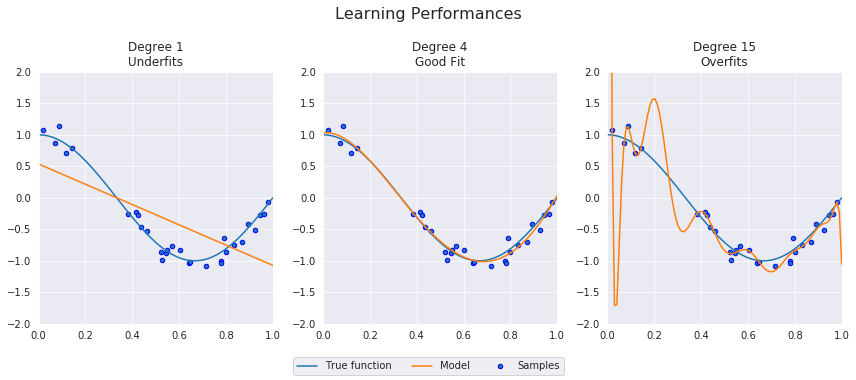

In [4]:
overunderfitting_example()

## Further Reading

+ [Different meanings of bias](https://www.quora.com/What-is-bias-in-machine-learning-algorithms)
+ [Read N°1 on biased data](https://towardsdatascience.com/preventing-machine-learning-bias-d01adfe9f1fa)
+ [Read N°2 on biased data](https://towardsdatascience.com/identifying-and-correcting-label-bias-in-machine-learning-ed177d30349e)

*Note: The illustration of overfitting vs underfitting comes from [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html).*

___

# Shuffle and Split Data

### Train / Test Sets

We prepare the dataset for training the model:

+ randomly shuffle data, in order to remove any bias that could stem from the original ordering of the dataset.
+ split the dataset into training and testing subsets. Using a `random_state` ensures the split is always the same.


Why split a dataset into some ratio of training and testing subsets?

+ Our goal is to estimate likely performance of a model on out-of-sample data.
+ But, maximizing training accuracy rewards overly complex models that overfit the training data.
+ Testing accuracy is a better estimate of out-of-sample performance.


### K-Fold Cross-Validation


Limitations of train/test split:

+ Testing accuracy can change a lot depending on a which observation happen to be in the testing set: it has a **high variance**.
+ Using **K-fold cross-validation** helps mitigate this problem (see illustration below):
    + the dataset is divided in K subsets of equal size called "folds".
    + the model is trained K times, each run holding out a different fold as test set.
    + the average testing score is used as an estimate of out-of-sample performance.
+ This is especially useful for hyperparameters tuning, as it avoids combinations that overfit the training set.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=550px align=left>

More information about Cross-Validation can be found [here](https://scikit-learn.org/stable/modules/cross_validation.html).

___

# Prediction Error

## Definition

The figure below shows the relationship between model complexity and training/validation errors. The optimal model has the **lowest generalization error**, and is marked by a dashed line.

+ A model that is **too simple** will not predict either set accurately: **both training & validation errors** will be **high** *(left)*.
+ A model that is **too complex** will capture the noise in the training set and generalize poorly: its **validation error** will be **much higher** *(right)*.

<img src=https://sebastienplat.s3.amazonaws.com/d349c234f3a819be20b29ad950e629701472143635989 align=left>

## Mathematical Expressions

In the regression setting, the most commonly-used measure is the **mean squared error (MSE)**. 

The **expected MSE of a given observation $x_0$** refers to the average test MSE that we would obtain if we repeatedly estimated $f$ using a **large number of training sets**, and tested each at $𝑥_0$. 

$$\operatorname{E}\Big[\big(y_0 - \hat{f}(x_0)\big)^2\Big] = \Big(\operatorname{Bias}\big[\hat{f}(x_0)\big] \Big) ^2 + \operatorname{Var}\big[\hat{f}(x_0)\big] + \operatorname{Var}(\epsilon)$$

$\operatorname{Bias}\big[\hat{f}(x_0)\big] = \operatorname{E}\big[\hat{f}(x_0)\big] - f(x_0)\qquad\qquad$ _Bias = Average Error_

$\operatorname{Var}\big[\hat{f}(x_0)\big] = \operatorname{E}\big[\hat{f}(x_0)^2\big] - \operatorname{E}\big[{\hat{f}}(x_0)\big]^2\qquad$ _Variance = Average Variation of the Prediction around its Mean_

$\operatorname{Var}(\epsilon)\qquad\qquad\qquad\qquad\qquad\qquad\qquad$ _Irreducible Error = Variance of the Random Error Term_

+ _Note1: The **overall expected value** can be computed by averaging the expected value of all $x_0$ in the data set._
+ _Note2: It is not possible to properly split the training MSE because the training set is different for each iteration of the training process._

## Example

We can break down the Test MSE for a simple example where we know:

+ the true underlying function $f$.
+ the irreducible error $\operatorname{Var}(\epsilon)$, which corresponds to the lowest achievable test MSE.

_Note: In a real-life situation in which $f$ is unobserved, it is generally not possible to explicitly compute the test MSE, bias, or variance for a statistical learning method. We can use cross-validation to estimate the test MSE using the training data._

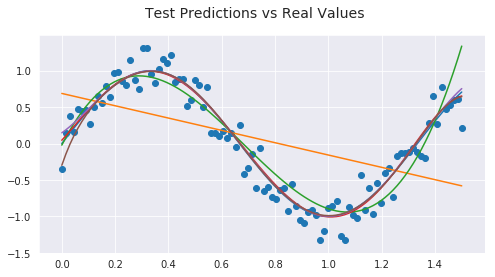

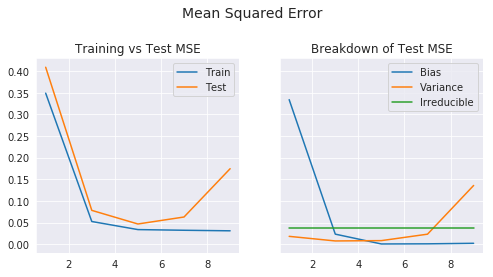

In [488]:
# example of over- and underfitting polynomial models for a simple function
degrees = range(1, 11, 2)
ouf_cos = ov.OverUnderFit(true_func='cos')
ouf_cos.overunderfitting_example(degrees=degrees, test_size=50, n_iterations=100)

___

# Learning Curves

*Note: a list of scorers is available [here](https://scikit-learn.org/stable/modules/model_evaluation.html).*

### Example

We test the performance of a decision tree model with four different maximum depths. The learning curves show the R<sup>2</sup> for both training and testing sets, as the training set gets larger. More info on learning curves can be found [here](https://scikit-learn.org/stable/modules/learning_curve.html).

_Note: the shaded region of a learning curve denotes the uncertainty of that curve (measured as one standard deviation)._

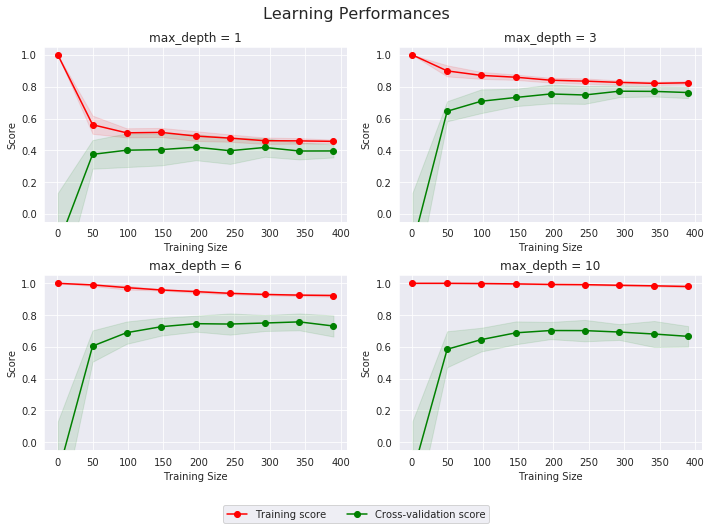

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
boston = vs.ModelSelector()
boston.ModelLearning()

### High Bias Scenario

A model suffers from high bias (underfitting) when the model does not fit the data well:
    
+ the training score quickly decreases when the training size increases, towards a low value.
+ the testing score rapidly converges towards the low training score.

In these instances *(as seen above when max_depth=1)*, collecting more data points will likely not benefit the model.

### High Variance Scenario

A model suffers from high variance (overfitting) when the model does not generalizes well to out-of-sample data:
    
+ the training score stays very high, even when the training size increases.
+ the testing score never reaches a very high value.

In these instances *(as seen above when max_depth=10)*, collecting more data points might help limit the overfitting.

### Ideal Scenario

The ideal scenario shows the testing score getting closer to the training score as the training size increases, towards a high value. *This is seen above when max_depth=3, and to a lesser extent when max_depth=6.*

___

# Validation Curves

### Example

We test the performance of a decision tree model with various maximum depths. The learning curves show the R<sup>2</sup> for both training and testing sets, as the maximum depth increases. More information on validation curves can be found [here](https://scikit-learn.org/stable/modules/learning_curve.html#validation-curve).

_Note: using grid search is typically more suited to identifying optimal hyperparameters values._

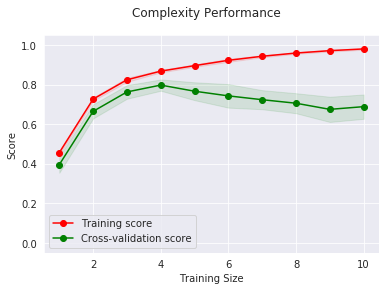

In [7]:
boston.ModelComplexity()

### Bias - Variance Tradeoff

As shown in the validation curves, the model behavior depends on the maximum depth:

+  1: underfits the data. Both train and test scores are low.
+  4: fits the data the best. It has the highest test score, that is close to the train score.
+ 10: overfits the train set and does not generalize well.

___

# Improving Models

## General Strategy

+ large sample size, few features: a flexible model would fit the data better; the large sample size will limit the overfitting.
+ small sample size, large amount of features: a flexible model would probably overfit the training set.
+ large variance of the error term: a flexible model would probably capture the noise and generalize poorly.

## High Bias

Training error will also be high. Potential solutions:

+ Add new features.
+ Add more complexity by introducing polynomial features.

## High Variance

Training error will be much lower than test error. Potential solutions:

+ Increase training size.
+ Reduce number of features, especially those with weak signal to noise ratio.
+ Increase Regularization terms.

## Regularization Terms

Regularization aims to prevent overfitting by penalizing large weights when training the model. It adds a regularization term to the loss function, with a regularization parameter called $\lambda$.

**L1 Regularization - LASSO**

+ L1 regularization penalizes the absolute value of the weights. 
+ It can do feature selection: insignificant input features are assigned a weight of zero.
+ The resulting models are simple and interpretable, but cannot learn complex patterns.

**L2 Regularization - Ridge Regularization**

+ L2 regularization penalizes the square of the weights. 
+ It forces the weights to be small but not zero.
+ Taking squares into account makes it sensititive to outliers.
+ It is able to learn complex data patterns.

*See also [this link](https://medium.com/datadriveninvestor/l1-l2-regularization-7f1b4fe948f2) for more information.*

## Hyperparameters Tuning

More information on hyperparameters tuning can be found [here](https://scikit-learn.org/stable/modules/grid_search.html).

In the **[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)** technique, we define a range of values for every parameter we want to tune. The Grid Search will train models for each combination of values using K-fold CV, then outputs the compared performances.

This technique can become VERY resource-intensive for large datasets. In might be better to use **[RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)** in those instances.

___

# Curse of Dimensionality

## Definition

> As the number of features or dimensions grows, the amount of data we need to generalize accurately grows exponentially.

When the dimensionality increases (often with hundreds or thousands of dimensions), the volume of the space increases so fast that the available **data become sparse**. This sparsity is problematic for any method that requires **statistical significance**. It also prevents efficient clustering, as all data points become equidistant from one another.

In Machine Learning, an **enormous amount of training data** is required to ensure that there are **several samples** with each **combination of values**. A typical rule of thumb is that there should be **at least 5 training examples** for each dimension in the representation.

With a **fixed number of training samples**, the **power** of a classifier or regressor **first increases** as number of dimensions/features used is increased but then decreases. This is known as Hughes phenomenon or peaking phenomena.

A few methods exist to reduce the dimentionality of a dataset:
+ Principal Component Analysis
+ Linear Discriminant Analysis

A brief explanation of the difference between the two methods can be found [here](https://sebastianraschka.com/faq/docs/lda-vs-pca.html).

## Principal Component Analysis (PCA)

**Definition**


**Principal Components Analysis (PCA)** creates a set of principal components that are:
+ rank-ordered by variance (the first component accounts for as much of the variability in the data as possible).
+ uncorrelated (to prevent [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) issues).
+ low in number (we can throw away the lower ranked components as they contain little signal).

Each principal component is:
+ a **linear combination** of the individual features. 
+ **orthogonal** to the previous principal components.


**Limitations**

There are two main limitations to PCA:
+ We lose a lot of interpretability.
+ It is concerned only with the (co)variance within the predictor matrix $x$. 

Dimension reduction by PCA can be harmful to predictions if $y$ only depends on predictors in $X$ that have a low (co)variance with other predictors.


> If the predictive relationship between the predictors and response is not connected to the predictors’ variability, then the derived PCs will not provide a suitable relationship with the response.

**Mathematical Details**

The PCA is based on the [**covariance matrix**](https://en.wikipedia.org/wiki/Covariance_matrix) of the data that has been transformed to be centered around the origin (by subtracting the mean of each variable). The eigenvalues and corresponding eigenvectors are calculated and normalized.

Zoom on these [terms](https://www.geeksforgeeks.org/principal-component-analysis-with-python/):
+ eigenvectors: new set of axes of the principal component space.
+ eigenvalues: quantity of variance that each eigenvector have.


_Note: PCA is sensitive to the relative scale of your features. Using [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from `scikit-learn`:_
+ `MinMaxScaler` scales each observation to be a predefined range (typically 0 to 1).
+ `StandardScaler` calculates the standard score Z of each observation.

A complete example can be found [here](https://www.geeksforgeeks.org/principal-component-analysis-with-python/).

## Linear discriminant analysis (LDA) for Classification

**Definition**

[**Linear discriminant analysis (LDA)**](https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/) finds a linear combination of features that separates two or more classes of objects or events. 

It differs from ANOVA:
+ LDA uses **continuous features** and a **categorical outcome**.
+ ANOVA uses **categorical features** and a **continuous outcome**.


**Limitations**

LDA assumptions are the same as for linear regression:
+ Normality.
+ Homogeneity of variance (homoscedasticity vs heteroscedasticity).
+ Independent observations.

It is very similar to logistic regression, but its more stringent sets of hypothesis means it is rarely used today.

**Mathematical Details**

Discriminant analysis works by creating one or more linear combinations of predictors, creating a new **latent variable** for each discriminant function. LDA explicitly attempts to model the **difference between the classes** of data: it  uses information of classes to find new features in order to maximize **its separability**.


Two criteria are used by LDA to create a new axis:

+ Maximize the distance between means of the two classes.
+ Minimize the variation within each class.

**Generalization**

+ **Quadratic Discriminant Analysis (QDA)**: Each class uses its own estimate of variance (or covariance when there are multiple input variables).
+ **Flexible Discriminant Analysis (FDA)**: Where non-linear combinations of inputs is used such as splines.
+ **Regularized Discriminant Analysis (RDA)**: Introduces regularization into the estimate of the variance (actually covariance), moderating the influence of different variables on LDA.

**Applications**

+ **Face Recognition**: In the field of Computer Vision, face recognition is a very popular application in which each face is represented by a very large number of pixel values. Linear discriminant analysis (LDA) is used here to reduce the number of features to a more manageable number before the process of classification. Each of the new dimensions generated is a linear combination of pixel values, which form a template. The linear combinations obtained using Fisher’s linear discriminant are called Fisher faces.

+ **Medical**: In this field, Linear discriminant analysis (LDA) is used to classify the patient disease state as mild, moderate or severe based upon the patient various parameters and the medical treatment he is going through. This helps the doctors to intensify or reduce the pace of their treatment.

+ **Customer Identification**: Suppose we want to identify the type of customers which are most likely to buy a particular product in a shopping mall. By doing a simple question and answers survey, we can gather all the features of the customers. Here, Linear discriminant analysis will help us to identify and select the features which can describe the characteristics of the group of customers that are most likely to buy that particular product in the shopping mall.